# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Importing the dataset

In [ ]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


# Implementing Thompson sampling algorithm

In [ ]:
N = 10000
d = 10
ads_selected = []
nr1 = [0] * d
nr0 = [0] * d
total_rewards = 0
for n in range(0, N):
  ad = 0 
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(nr1[i] + 1, nr0[i] + 1)
    if(random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward:
    nr1[ad] += 1
  else:
    nr0[ad] += 1
  total_rewards += reward

 # Visualising the results

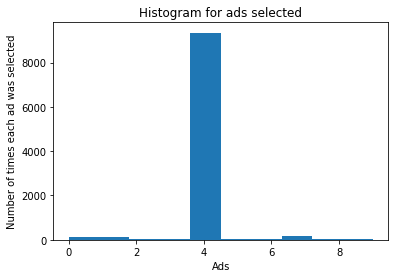

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram for ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()